Welcome to Salary Prediction System
Press ENTER key to proceed

Creating Dataset
Dataset created
Enter test data size (between 0 and 1)0.5
Model creation in progression
Model is created
Press ENTER key to predict test data in trained model

[[ 9.5]
 [ 3.2]
 [ 2. ]
 [10.3]
 [ 4.9]
 [ 8.7]
 [ 5.1]
 [ 4.1]
 [ 1.3]
 [ 2.2]
 [ 4. ]
 [ 3. ]
 [ 7.9]
 [ 5.9]
 [ 7.1]]   ... [116969.  54445.  43525. 122391.  67938. 109431.  66029.  57081.  46205.
  39891.  56957.  60150. 101302.  81363.  98273.]   ... [115696.30854674  57317.18884101  46197.35651611 123109.53009668
  73070.28463462 108283.08699681  74923.5900221   65657.06308469
  39710.78765992  48050.66190359  64730.41039094  55463.88345353
 100869.86544687  82336.81157204  93456.64389694]
[9.5] ... 116969.0 ... 115696.30854674138
[3.2] ... 54445.0 ... 57317.188841010066
[2.] ... 43525.0 ... 46197.356516108855
[10.3] ... 122391.0 ... 123109.53009667553
[4.9] ... 67938.0 ... 73070.2846346201
[8.7] ... 109431.0 ... 108283.08699680725
[5.1] ... 6

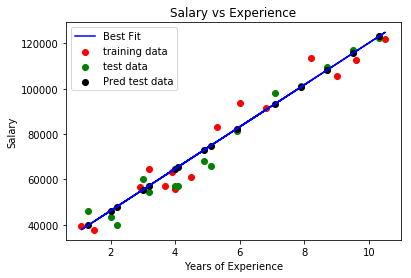

Model is 96.22% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, separated by comma
5,10,25


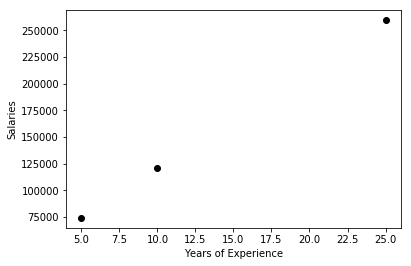

   Experience       Salaries
0         5.0   73996.937328
1        10.0  120329.572015
2        25.0  259327.476077



In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()
def graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred):
    plt.scatter(X_train,Y_train,color='red',label='training data')
    plt.plot(X_train,regressionObject.predict(X_train),color='blue',label='Best Fit')
    plt.scatter(X_test,Y_test,color='green',label='test data')
    plt.scatter(X_test,Y_pred,color='black',label='Pred test data')
    plt.title("Salary vs Experience")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()
def main():
    welcome()
    try:
        print('Creating Dataset')
        dataset=pd.read_csv('Salary_Data.csv')
        print('Dataset created')
        X=dataset.iloc[:,:-1].values
        Y=dataset.iloc[:,-1].values
        s=float(input("Enter test data size (between 0 and 1)") )
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=s)
        print("Model creation in progression")
        regressionObject=LinearRegression()
        regressionObject.fit(X_train,Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()

        Y_pred=regressionObject.predict(X_test)
        i=0
        print(X_test,'  ...',Y_test,'  ...',Y_pred)
        while i<len(X_test):
            print(X_test[i],'...',Y_test[i],'...',Y_pred[i])
            i+=1
        print("Press ENTER key to see above result in graphical format")
        input()
        graph(X_train,Y_train, regressionObject, X_test, Y_test, Y_pred)
        r2=r2_score(Y_test,Y_pred)
        print("Model is %2.2f%% accurate" %(r2*100))

        print("Now you can predict salary of an employee using our model")
        print("\nEnter experience in years of the candidates, separated by comma")

        exp=[float(e) for e in input().split(',')]
        ex=[]
        for x in exp:
            ex.append([x])
        experience =np.array(ex)
        salaries=regressionObject.predict(experience)

        plt.scatter(experience,salaries,color='black')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salaries')
        plt.show()

        d=pd.DataFrame({'Experience':exp,'Salaries':salaries})
        print(d)
        
    except FileNotFoundError:
        print('No csv file in the directory')
        print("Press ENTER key to exit")
        input()
        exit()

if __name__=="__main__":
    main()
    input()
